In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns;

In [24]:
merged = open("../result_dense_vector_marv_noht_201811131126/merged.csv","a")
for line in open("../result_dense_vector_marv_noht_201811131126/hpxmp_dense_vector_2th_run.csv"):
    merged.write(line)
for num in range(3,12):
    f = open("../result_dense_vector_marv_noht_201811131126/hpxmp_dense_vector_"+str(num)+"th_run.csv")
    f.__next__() #skip the header
    for line in f:
        merged.write(line)
    f.close()
merged.close()
                 

In [25]:
hpxmp = pd.read_csv('../result_dense_vector_marv_noht_201811131126/merged.csv')
hpxmp.head() 

,mfc/s,num_threads,vector_size
0,35.1663,1,100000
1,61.2999,2,100000
2,90.1417,3,100000
3,113.0220,4,100000
4,142.7730,5,100000


In [26]:
hpxmp.columns
selected_columns = hpxmp[['mfc/s','num_threads','vector_size']]
selected_columns.head()

,mfc/s,num_threads,vector_size
0,35.1663,1,100000
1,61.2999,2,100000
2,90.1417,3,100000
3,113.0220,4,100000
4,142.7730,5,100000


In [27]:
hpxmp_1_2 = selected_columns.groupby(['num_threads','vector_size']).mean()
hpxmp_1_2.head()

mfc/s
num_threads vector_size          
1           100000       36.65065
            200000       37.97518
            300000       39.67519
            400000       38.62301
            500000       39.30164

In [28]:
hpxmp_1_2 = hpxmp_1_2.reset_index()
hpxmp_1_2.head()

,num_threads,vector_size,mfc/s
0,1,100000,36.65065
1,1,200000,37.97518
2,1,300000,39.67519
3,1,400000,38.62301
4,1,500000,39.30164


In [34]:
hpxmp_1_2.pivot('num_threads','vector_size','mfc/s').head(16)

vector_size,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000
num_threads,,,,,,,,,,
1,36.650650,37.97518,39.67519,38.62301,39.30164,40.82329,41.61821,42.06919,40.23964,45.87546
2,67.741160,75.93075,76.92422,78.70288,78.61433,79.02596,80.26783,81.07797,81.32432,80.89970
3,96.089990,104.73310,113.54550,116.57220,116.36760,119.43900,123.16950,118.90250,122.17350,123.77950
4,118.791400,136.16580,154.93410,153.25640,157.40740,158.23200,162.05440,164.93670,164.24080,167.05800
5,138.906900,172.13450,176.33580,186.02370,195.22410,197.19420,199.39000,200.64560,194.79800,206.35260
6,171.804500,207.95030,213.81060,238.68750,240.54230,244.77440,254.13670,251.85190,258.06250,261.68340
7,181.258800,226.20450,237.78570,264.95870,264.10070,286.72190,276.34450,283.85420,292.74490,310.31370
8,197.267300,240.76430,275.37400,289.68680,297.84380,322.46060,320.71730,325.59280,328.55880,336.70980
9,197.314200,246.15090,237.39531,258.96422,291.28460,289.49140,298.04120,301.33440,294.06030,298.48170


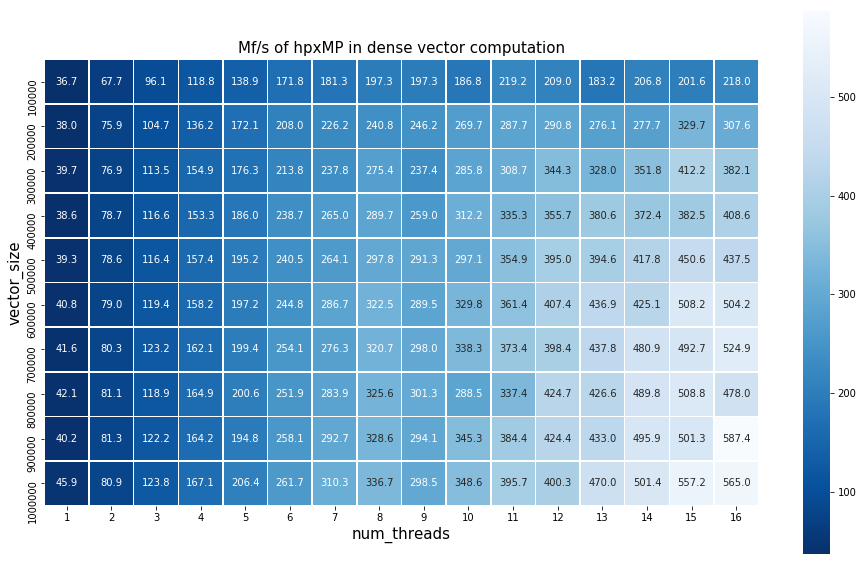

In [43]:
plt.figure(figsize=(16,10))
pivot_table = hpxmp_1_2.pivot('vector_size','num_threads','mfc/s')
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('Mf/s of hpxMP in dense vector computation',size = 15)
sns_plot = sns.heatmap(pivot_table,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')


In [49]:
figure = sns_plot.get_figure()
figure.savefig('../result_dense_vector_marv_noht_201811131126/hpxmp')